In [4]:
#imports
import os
import json
import pandas as pd
import polars as pl
from utils import list_folders, json_to_dataframe, list_all_files, add_districts


main_folder = 'snapshots'
dates = list_folders(main_folder)
files = list_all_files(main_folder, dates)

#stations_data = json_to_polar_dataframe(files)
stations_data = json_to_dataframe(files)


In [ ]:
# BENCHMARK: PANDAS VS POLARS
import timeit

setup_code = '''
from __main__ import json_to_dataframe, json_to_polar_dataframe, files
'''

"""
pandas_time = timeit.timeit('json_to_dataframe(files)', setup=setup_code, number=1)
polars_time = timeit.timeit('json_to_polar_dataframe(files)', setup=setup_code, number=1)

print(f"Tiempo de ejecución usando pandas: {pandas_time} segundos")
print(f"Tiempo de ejecución usando polars: {polars_time} segundos")
"""

# RESULTADOS
# TAMAÑO: 1.75GB, ARCHIVOS: 10.078, FILAS: 5.139.780
# Tiempo de ejecución usando pandas: 43.36 segundos
# Tiempo de ejecución usando polars: 19.77 segundos

'\npandas_time = timeit.timeit(\'json_to_dataframe(files)\', setup=setup_code, number=1)\npolars_time = timeit.timeit(\'json_to_polar_dataframe(files)\', setup=setup_code, number=1)\n\nprint(f"Tiempo de ejecución usando pandas: {pandas_time} segundos")\nprint(f"Tiempo de ejecución usando polars: {polars_time} segundos")\n'

In [ ]:
# order values by timestamp file
station_id = "10"
station_1 = stations_data[stations_data['station_id'] == station_id]
station_1['dt'] = pd.to_datetime(station_1['timestamp_file'], unit='s')
station_1 = station_1.sort_values(by='dt')
station_1.set_index('dt', inplace=True)

station_1['num_bikes_available_hourly_avg'] = station_1['num_bikes_available'].rolling(window='1h').mean()
station_1['num_bikes_available_ebikes_hourly_avg'] = station_1['num_bikes_available_types.ebike'].rolling(window='1h').mean()
station_1['num_bikes_disabled_hourly_avg'] = station_1['num_bikes_disabled'].rolling(window='1h').mean()
station_1['num_docks_available_hourly_avg'] = station_1['num_docks_available'].rolling(window='1h').mean()
station_1['num_docks_disabled_hourly_avg'] = station_1['num_docks_disabled'].rolling(window='1h').mean()


station_1.reset_index(inplace=True)

station_1


/var/folders/md/jgs9sl817gxfmk03qhzt6bk80000gq/T/ipykernel_74289/2493714457.py:4: FutureWarning: The behavior of 'to_datetime' with 'unit' when parsing strings is deprecated. In a future version, strings will be parsed as datetime strings, matching the behavior without a 'unit'. To retain the old behavior, explicitly cast ints or floats to numeric type before calling to_datetime.
  station_1['dt'] = pd.to_datetime(station_1['timestamp_file'], unit='s')
/var/folders/md/jgs9sl817gxfmk03qhzt6bk80000gq/T/ipykernel_74289/2493714457.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  station_1['dt'] = pd.to_datetime(station_1['timestamp_file'], unit='s')


,dt,is_renting,is_installed,num_docks_available,traffic,last_reported,is_returning,num_docks_disabled,is_charging_station,status,...,num_bikes_disabled,num_bikes_available_types.ebike,num_bikes_available_types.mechanical,file,timestamp_file,num_bikes_available_hourly_avg,num_bikes_available_ebikes_hourly_avg,num_bikes_disabled_hourly_avg,num_docks_available_hourly_avg,num_docks_disabled_hourly_avg
0,2023-09-01 00:00:48,1,1,26,None,1693526397,1,0,True,IN_SERVICE,...,0,1,16,snapshots/2023-09-01/1693526448.json,1693526448,17.0,1.0,0.0,26.0,0.0
1,2023-09-01 00:01:45,1,1,26,None,1693526397,1,0,True,IN_SERVICE,...,0,1,16,snapshots/2023-09-01/1693526505.json,1693526505,17.0,1.0,0.0,26.0,0.0
2,2023-09-01 00:02:48,1,1,26,None,1693526397,1,0,True,IN_SERVICE,...,0,1,16,snapshots/2023-09-01/1693526568.json,1693526568,17.0,1.0,0.0,26.0,0.0
3,2023-09-01 00:03:45,1,1,26,None,1693526397,1,0,True,IN_SERVICE,...,0,1,16,snapshots/2023-09-01/1693526625.json,1693526625,17.0,1.0,0.0,26.0,0.0
4,2023-09-01 00:04:52,1,1,26,None,1693526663,1,0,True,IN_SERVICE,...,0,1,16,snapshots/2023-09-01/1693526692.json,1693526692,17.0,1.0,0.0,26.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10073,2023-09-07 23:55:37,1,1,23,None,1694130702,1,0,True,IN_SERVICE,...,0,1,19,snapshots/2023-09-07/1694130937.json,1694130937,20.0,1.0,0.0,23.0,0.0
10074,2023-09-07 23:56:41,1,1,23,None,1694130967,1,0,True,IN_SERVICE,...,0,1,19,snapshots/2023-09-07/1694131001.json,1694131001,20.0,1.0,0.0,23.0,0.0
10075,2023-09-07 23:57:41,1,1,23,None,1694130967,1,0,True,IN_SERVICE,...,0,1,19,snapshots/2023-09-07/1694131061.json,1694131061,20.0,1.0,0.0,23.0,0.0
10076,2023-09-07 23:58:43,1,1,23,None,1694130967,1,0,True,IN_SERVICE,...,0,1,19,snapshots/2023-09-07/1694131123.json,1694131123,20.0,1.0,0.0,23.0,0.0


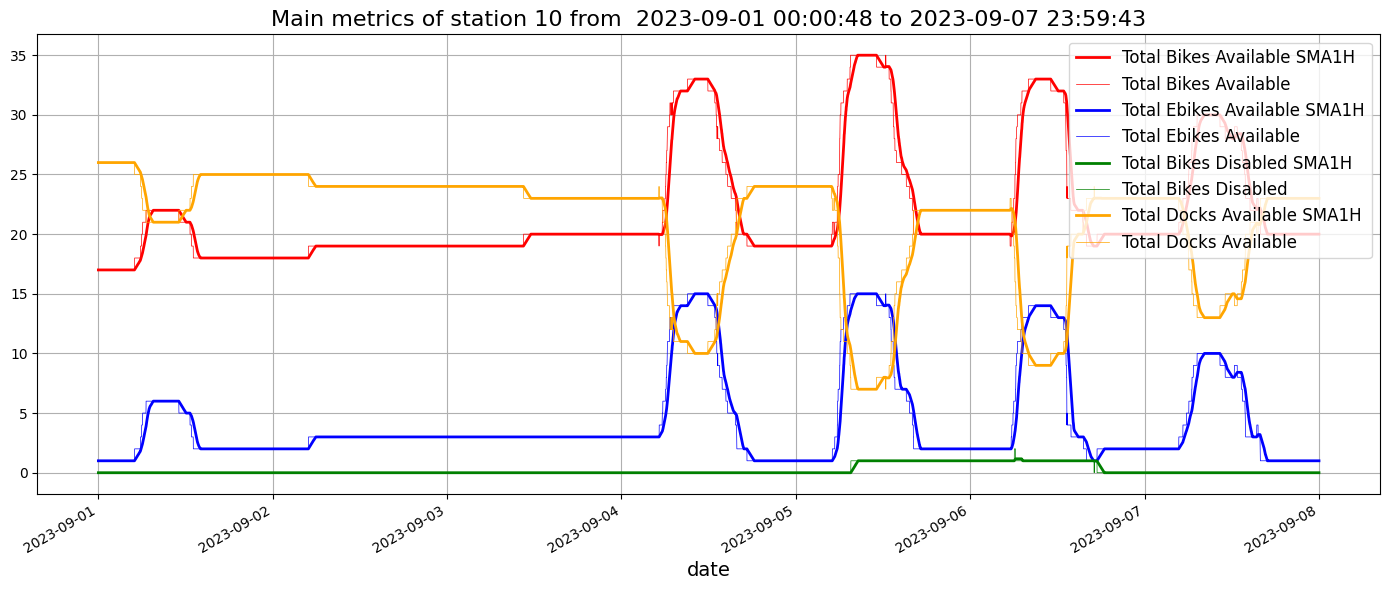

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.dates import DateFormatter


# Plot num_bikes_available vs. timestamp_file
# 1 septiembre 2023 -> viernes
plt.figure(figsize=(14, 6))

plt.plot(station_1['dt'], station_1['num_bikes_available_hourly_avg'], label='Total Bikes Available SMA1H', color='red', linewidth=2)
plt.plot(station_1['dt'], station_1['num_bikes_available'], label='Total Bikes Available', color='red', linewidth=0.5)

plt.plot(station_1['dt'], station_1['num_bikes_available_ebikes_hourly_avg'], label='Total Ebikes Available SMA1H', color='blue', linewidth=2)
plt.plot(station_1['dt'], station_1['num_bikes_available_types.ebike'], label='Total Ebikes Available', color='blue', linewidth=0.5)

plt.plot(station_1['dt'], station_1['num_bikes_disabled_hourly_avg'], label='Total Bikes Disabled SMA1H', color='green', linewidth=2)
plt.plot(station_1['dt'], station_1['num_bikes_disabled'], label='Total Bikes Disabled', color='green', linewidth=0.5)

plt.plot(station_1['dt'], station_1['num_docks_available_hourly_avg'], label='Total Docks Available SMA1H', color='orange', linewidth=2)
plt.plot(station_1['dt'], station_1['num_docks_available'], label='Total Docks Available', color='orange', linewidth=0.5)

plt.title('Main metrics of station ' + station_id + ' from  ' + str(station_1['dt'].min()) + ' to ' + str(station_1['dt'].max()), fontsize=16)
plt.xlabel('date', fontsize=14)
#plt.ylabel('Number of Bikes Available', fontsize=14)
plt.legend(fontsize=12)
plt.grid(True)

plt.gcf().autofmt_xdate()

plt.tight_layout()
plt.show()

In [ ]:
# Stations master file
#URL: https://opendata-ajuntament.barcelona.cat/data/es/dataset/informacio-estacions-bicing
stations_master_file = main_folder+ '/2024_05_Maig_BicingNou_INFORMACIO.csv'

# Polars
#stations_master = pl.read_csv(stations_master_file, ignore_errors = True)

# Pandas
stations_master = pd.read_csv(stations_master_file).sort_values(by='station_id')
stations_master['last_updated'] = pd.to_datetime(stations_master['last_updated'])
stations_master = stations_master.sort_values('last_updated').groupby('station_id').last()

# Highest stations
#stations_master.sort_values(by='altitude', ascending=False, inplace=True)
stations_master.head(10).to_csv('stations.csv')
stations_data.head(10).to_csv('data.csv')

/var/folders/md/jgs9sl817gxfmk03qhzt6bk80000gq/T/ipykernel_74289/2798870403.py:9: DtypeWarning: Columns (9,12) have mixed types. Specify dtype option on import or set low_memory=False.
  stations_master = pd.read_csv(stations_master_file).sort_values(by='station_id')


/var/folders/md/jgs9sl817gxfmk03qhzt6bk80000gq/T/ipykernel_74289/844248234.py:2: FutureWarning: The behavior of 'to_datetime' with 'unit' when parsing strings is deprecated. In a future version, strings will be parsed as datetime strings, matching the behavior without a 'unit'. To retain the old behavior, explicitly cast ints or floats to numeric type before calling to_datetime.
  total_bikes['dt'] = pd.to_datetime(total_bikes['timestamp_file'], unit='s')


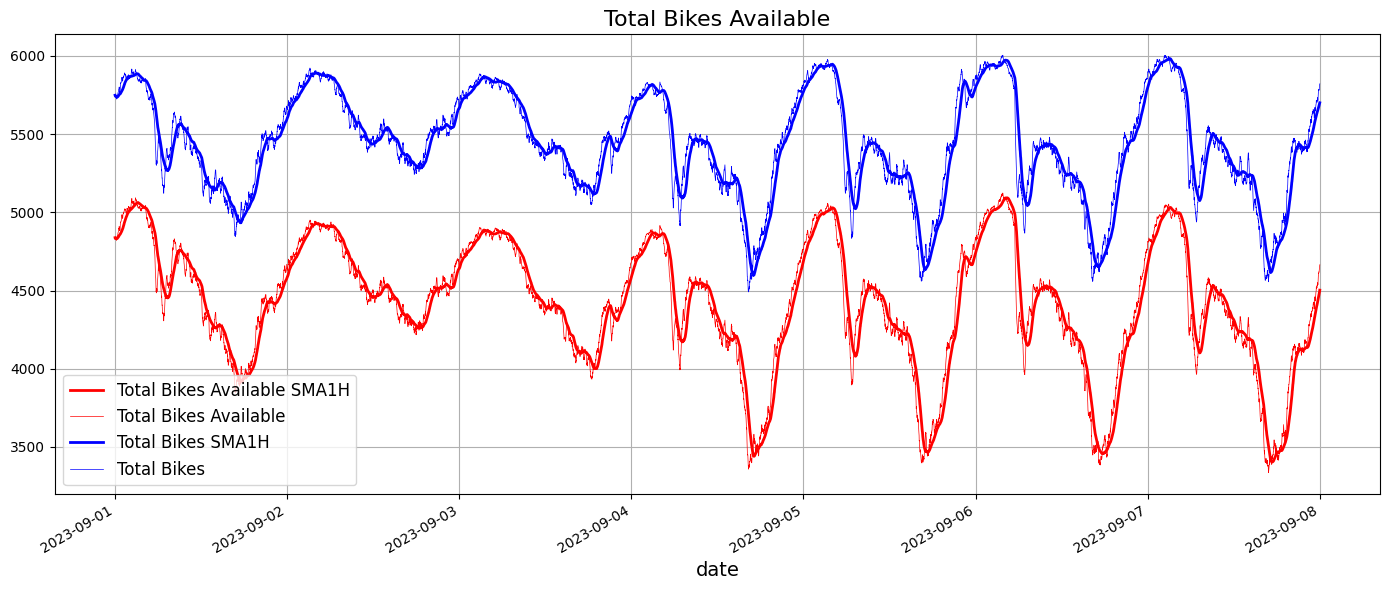

In [ ]:

total_bikes = json_to_dataframe(files)
total_bikes['dt'] = pd.to_datetime(total_bikes['timestamp_file'], unit='s')
# sum all bikes available by dt
total_bikes['total_bikes'] = total_bikes['num_bikes_available'] + total_bikes['num_bikes_disabled']
total_bikes = total_bikes[['dt', 'num_bikes_available', 'total_bikes']]
total_bikes = total_bikes.groupby('dt')[['num_bikes_available', 'total_bikes']].sum().reset_index()


# select only dt and num_bikes_available
total_bikes.set_index('dt', inplace=True)
total_bikes['num_bikes_available_hourly_avg'] = total_bikes['num_bikes_available'].rolling(window='1h').mean()
total_bikes['total_bikes_hourly_avg'] = total_bikes['total_bikes'].rolling(window='1h').mean()
total_bikes.reset_index(inplace=True)


import matplotlib.pyplot as plt
import numpy as np
from matplotlib.dates import DateFormatter


# Plot num_bikes_available vs. timestamp_file
# 1 septiembre 2023 -> viernes
plt.figure(figsize=(14, 6))

plt.plot(total_bikes['dt'], total_bikes['num_bikes_available_hourly_avg'], label='Total Bikes Available SMA1H', color='red', linewidth=2)
plt.plot(total_bikes['dt'], total_bikes['num_bikes_available'], label='Total Bikes Available', color='red', linewidth=0.5)

plt.plot(total_bikes['dt'], total_bikes['total_bikes_hourly_avg'], label='Total Bikes SMA1H', color='blue', linewidth=2)
plt.plot(total_bikes['dt'], total_bikes['total_bikes'], label='Total Bikes', color='blue', linewidth=0.5)

plt.title('Total Bikes Available', fontsize=16)
plt.xlabel('date', fontsize=14)
#plt.ylabel('Number of Bikes Available', fontsize=14)
plt.legend(fontsize=12)
plt.grid(True)

plt.gcf().autofmt_xdate()

plt.tight_layout()
plt.show()


In [ ]:

total_bikes['day'] = total_bikes['dt'].dt.date
total_bikes.groupby('day')['total_bikes'].max().reset_index().sort_values('day', ascending=False).head(10)

,day,total_bikes
6,2023-09-07,6004
5,2023-09-06,6005
4,2023-09-05,5978
3,2023-09-04,5834
2,2023-09-03,5886
1,2023-09-02,5923
0,2023-09-01,5917


/var/folders/md/jgs9sl817gxfmk03qhzt6bk80000gq/T/ipykernel_1212/3008684999.py:12: FutureWarning: The behavior of 'to_datetime' with 'unit' when parsing strings is deprecated. In a future version, strings will be parsed as datetime strings, matching the behavior without a 'unit'. To retain the old behavior, explicitly cast ints or floats to numeric type before calling to_datetime.
  total_bikes['dt'] = pd.to_datetime(total_bikes['timestamp_file'], unit='s')


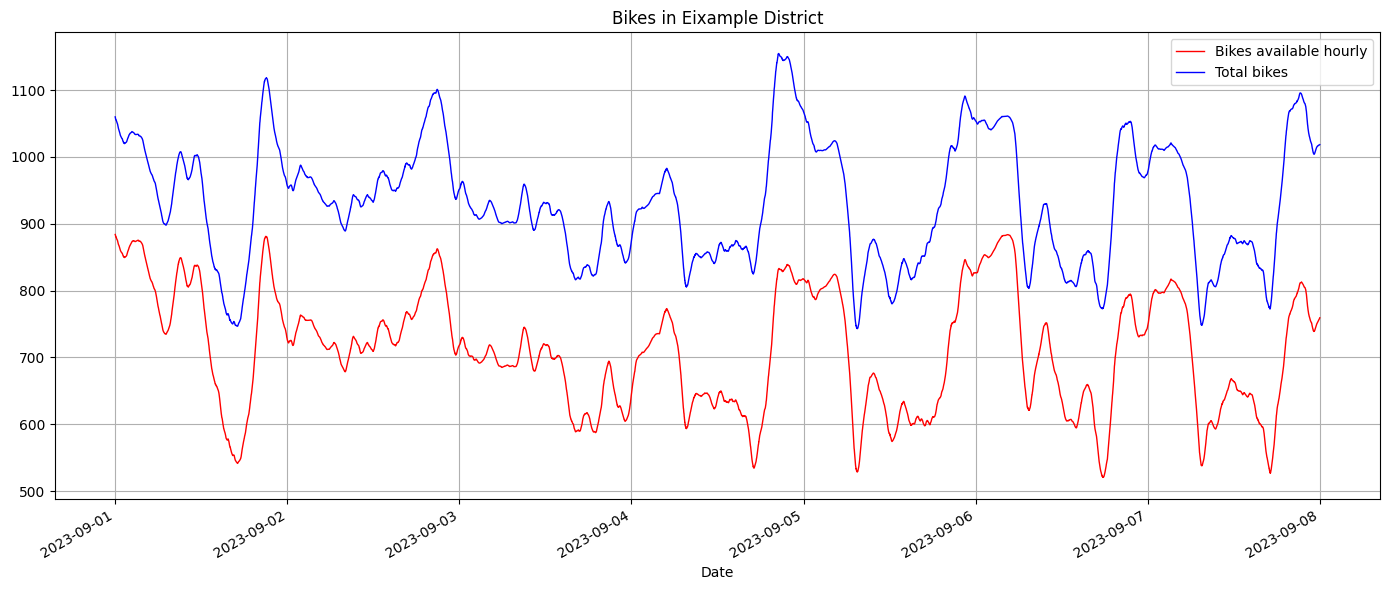

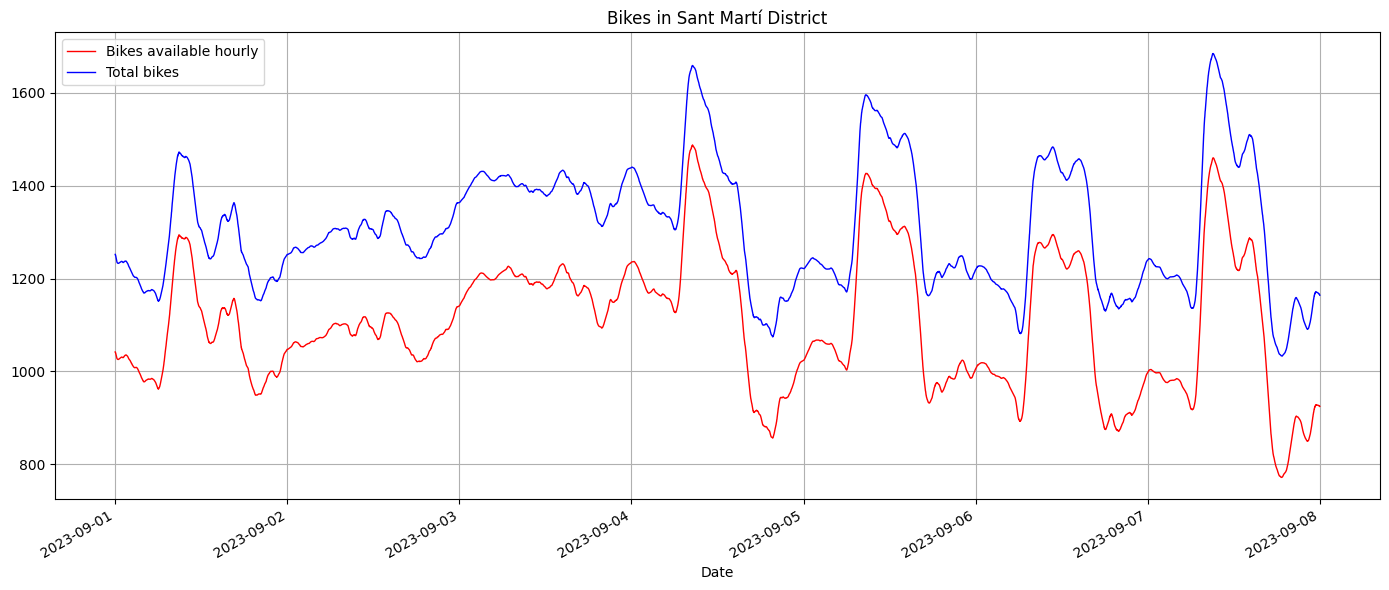

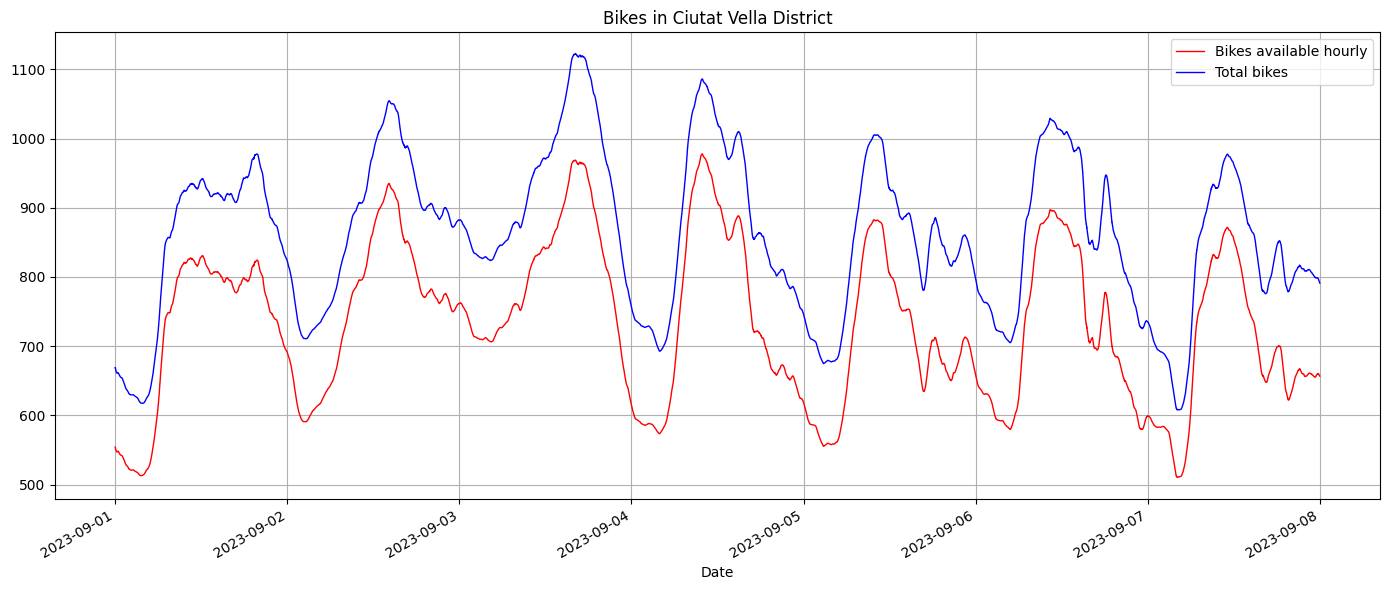

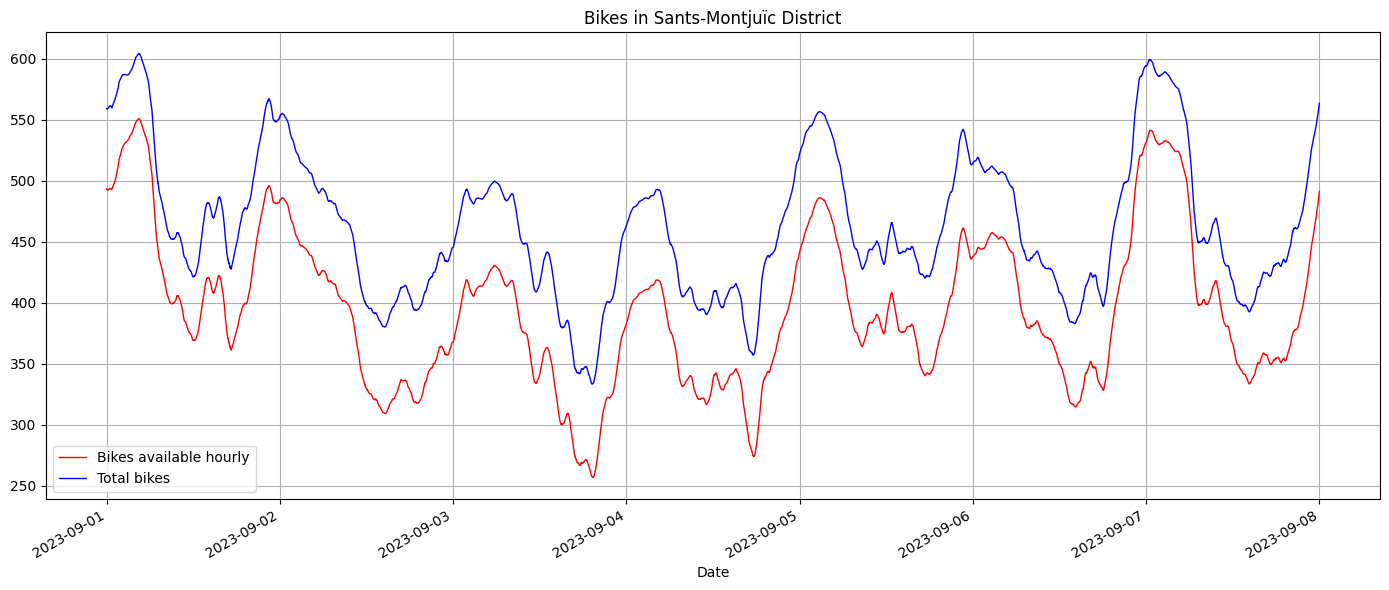

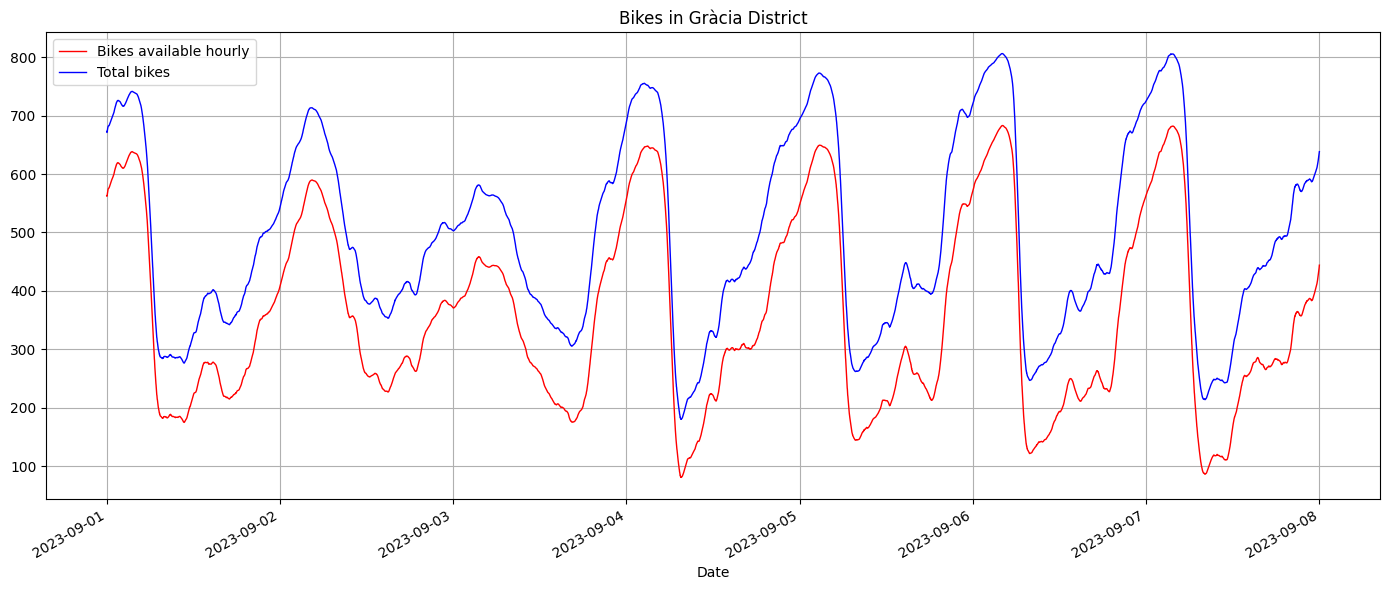

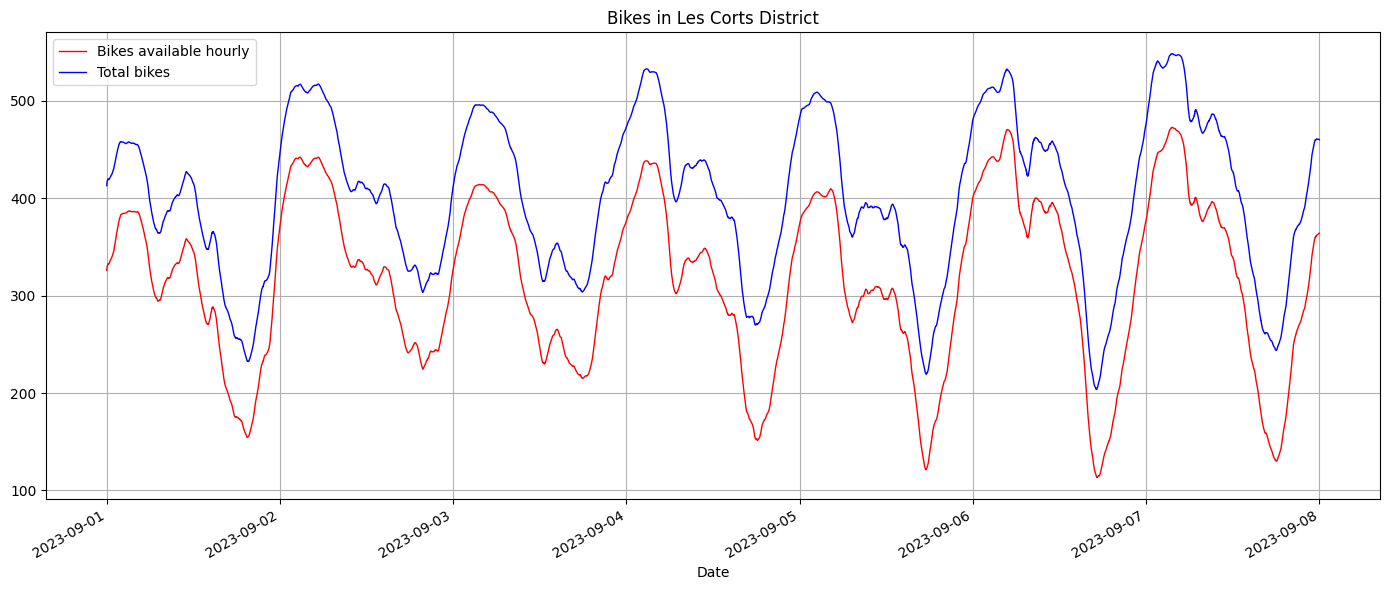

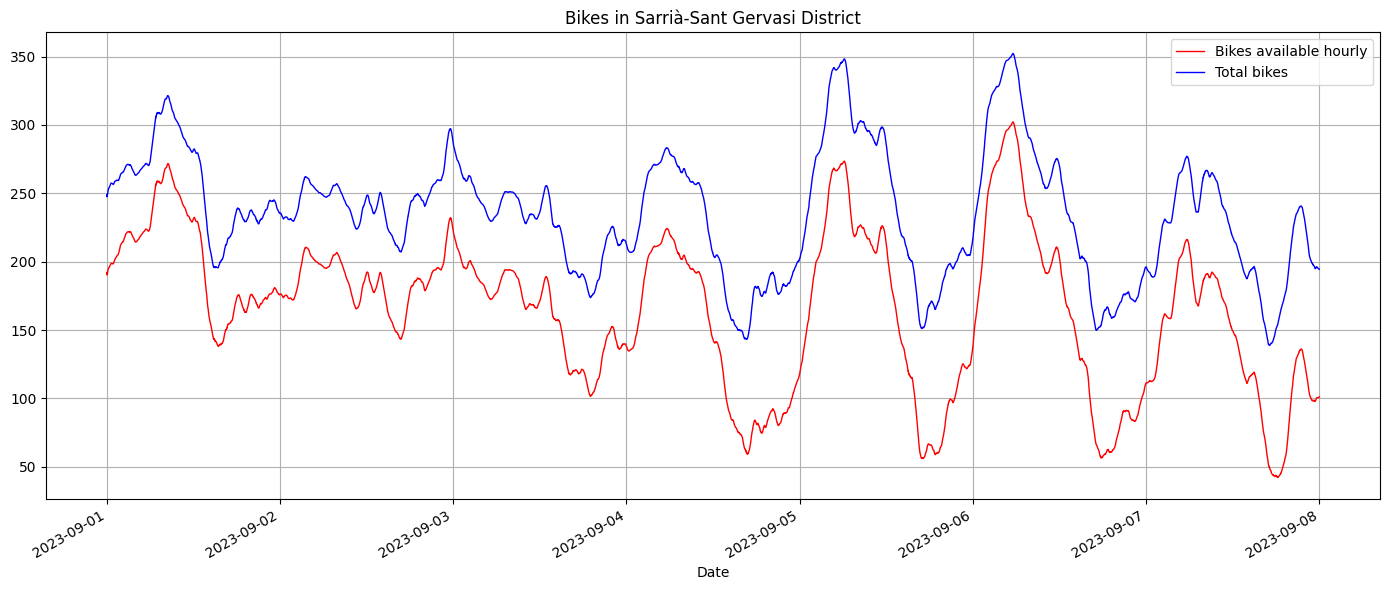

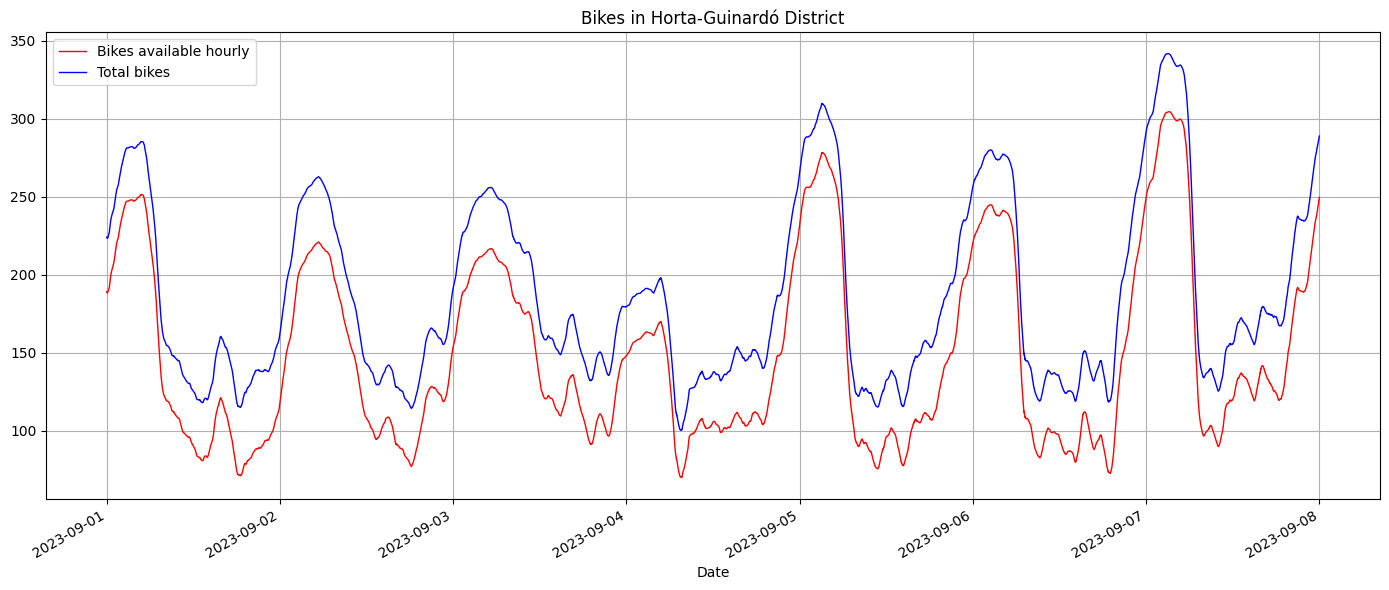

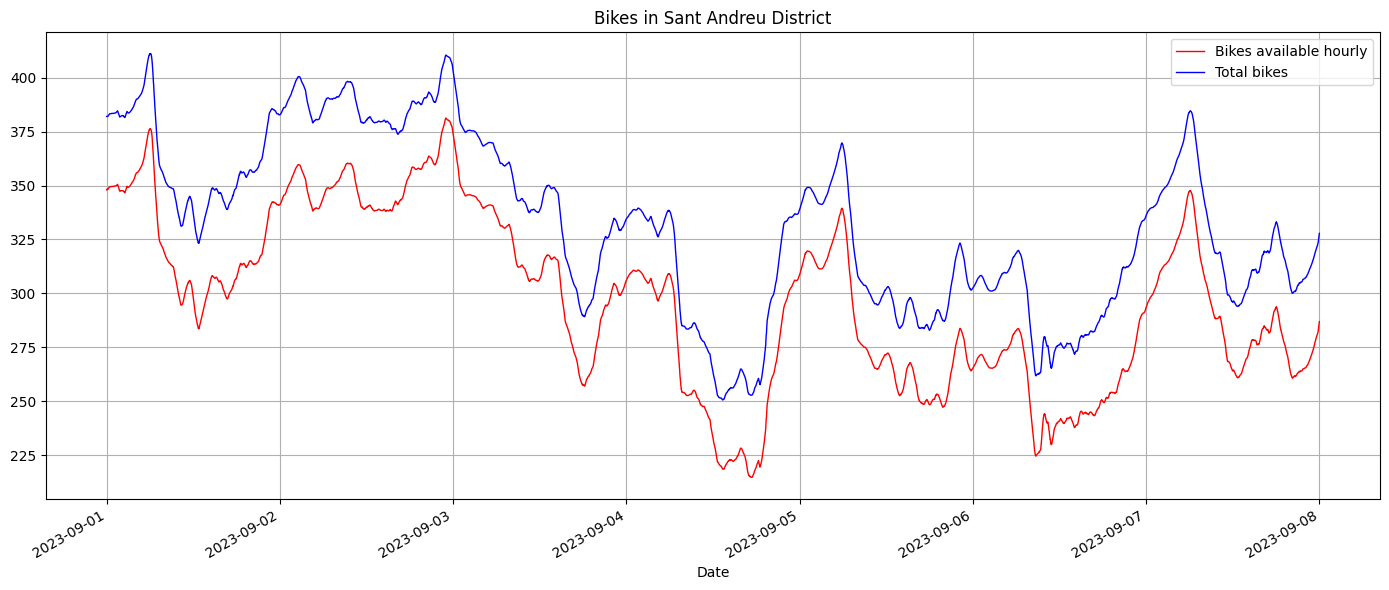

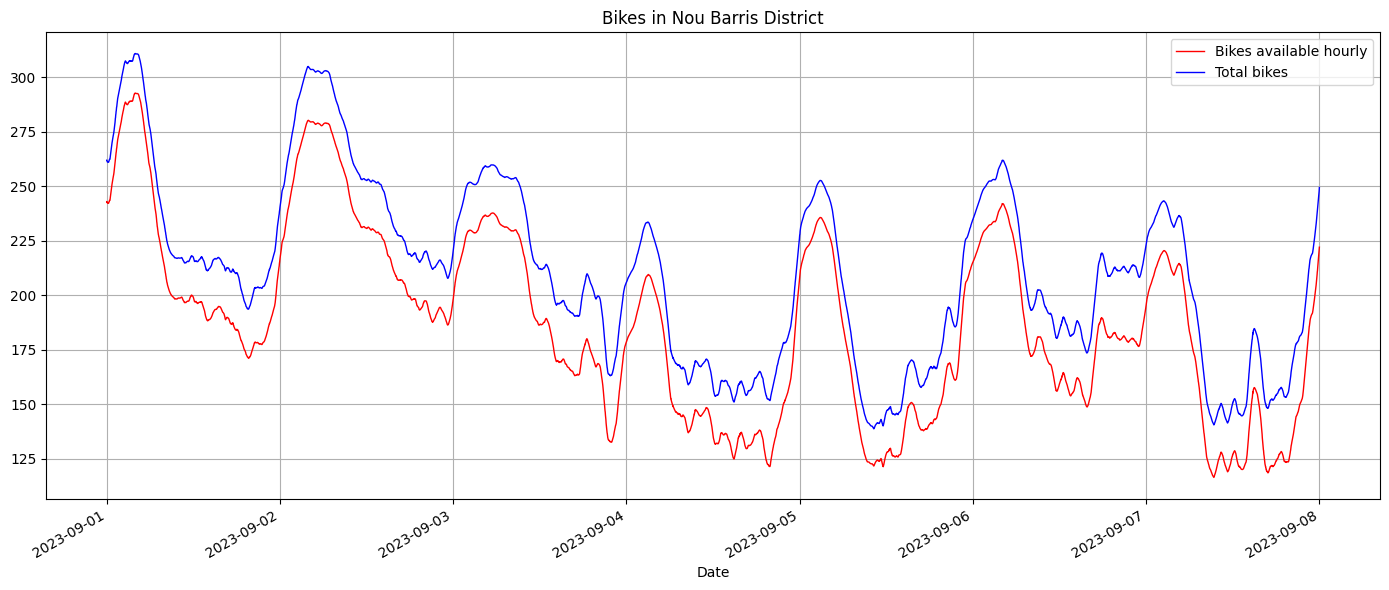

In [ ]:
import matplotlib.pyplot as plt
stations_master_file = main_folder+ '/2024_05_Maig_BicingNou_INFORMACIO.csv'

# Pandas
stations_master = pd.read_csv(stations_master_file, low_memory= False).sort_values(by='station_id')
stations_master['last_updated'] = pd.to_datetime(stations_master['last_updated'])
stations_master = stations_master.sort_values('last_updated').groupby('station_id').last()
stations_master = add_districts(stations_master)

###
total_bikes = json_to_dataframe(files)
total_bikes['dt'] = pd.to_datetime(total_bikes['timestamp_file'], unit='s')
# merge with stations master
# sum all bikes available by dt
total_bikes['total_bikes'] = total_bikes['num_bikes_available'] + total_bikes['num_bikes_disabled']

# Assuming 'stations_data' is defined elsewhere and properly loaded
districts = stations_master['district'].unique()
# change stations_district['short_name'] to int and to string
stations_master['short_name'] = stations_master['short_name'].astype(int).astype(str)

for district in districts:
    # filter by district
    total_bikes2 = total_bikes.copy()
    stations_district2 = stations_master[stations_master['district'] == district]
    stations_district = stations_district2['short_name'].to_list()
    total_bikes2 = total_bikes2[total_bikes2['station_id'].isin(stations_district)]

    total_bikes2 = total_bikes2[['dt' ,'num_bikes_available', 'total_bikes']]
    total_bikes2 = total_bikes2.groupby('dt')[['num_bikes_available', 'total_bikes']].sum().reset_index()


    # select only dt and num_bikes_available
    total_bikes2.set_index('dt', inplace=True)
    total_bikes2['num_bikes_available_hourly_avg'] = total_bikes2['num_bikes_available'].rolling(window='1h').mean()
    total_bikes2['total_bikes_hourly_avg'] = total_bikes2['total_bikes'].rolling(window='1h').mean()
    total_bikes2.reset_index(inplace=True)


    plt.figure(figsize=(14, 6))
    plt.plot(total_bikes2['dt'], total_bikes2['num_bikes_available_hourly_avg'], label='Bikes available hourly', color='red', linewidth=1)
    plt.plot(total_bikes2['dt'], total_bikes2['total_bikes_hourly_avg'], label='Total bikes', color='blue', linewidth=1)
    plt.title(f'Bikes in {district} District')
    plt.xlabel('Date')
    plt.legend()
    plt.grid(True)
    plt.gcf().autofmt_xdate()
    plt.tight_layout()
    plt.show()


/var/folders/md/jgs9sl817gxfmk03qhzt6bk80000gq/T/ipykernel_1212/4082580394.py:12: FutureWarning: The behavior of 'to_datetime' with 'unit' when parsing strings is deprecated. In a future version, strings will be parsed as datetime strings, matching the behavior without a 'unit'. To retain the old behavior, explicitly cast ints or floats to numeric type before calling to_datetime.
  total_bikes['dt'] = pd.to_datetime(total_bikes['timestamp_file'], unit='s')


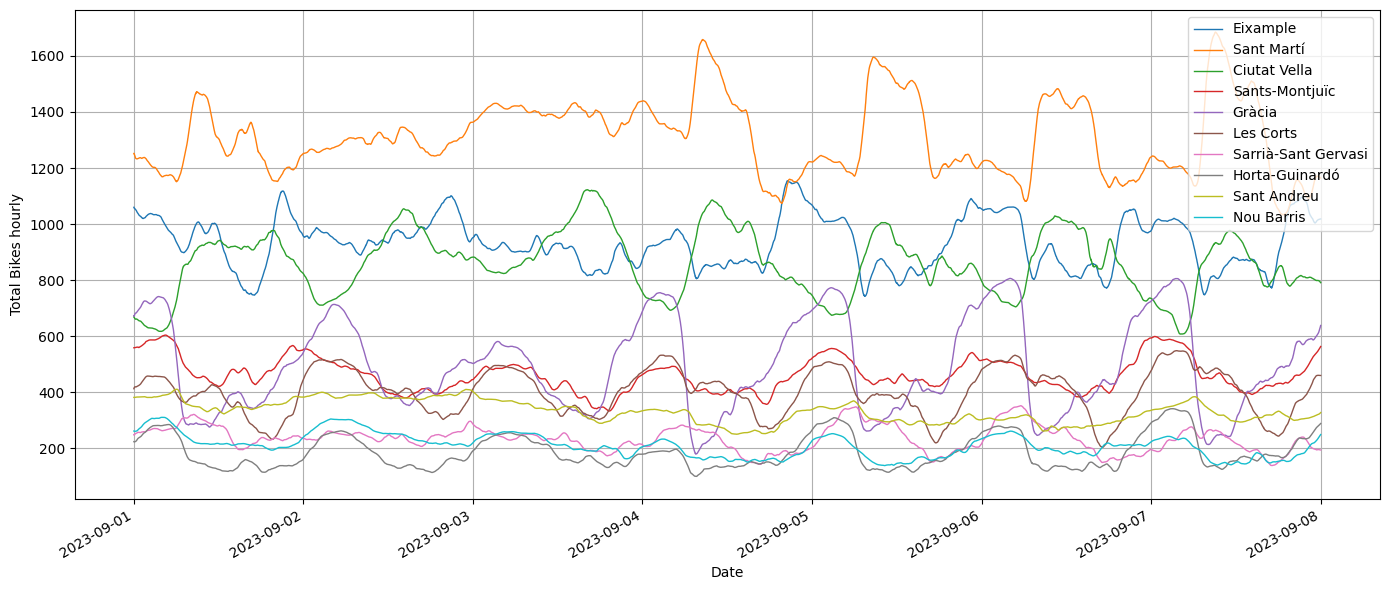

In [ ]:
import matplotlib.pyplot as plt
stations_master_file = main_folder+ '/2024_05_Maig_BicingNou_INFORMACIO.csv'

# Pandas
stations_master = pd.read_csv(stations_master_file, low_memory= False).sort_values(by='station_id')
stations_master['last_updated'] = pd.to_datetime(stations_master['last_updated'])
stations_master = stations_master.sort_values('last_updated').groupby('station_id').last()
stations_master = add_districts(stations_master)

###
total_bikes = json_to_dataframe(files)
total_bikes['dt'] = pd.to_datetime(total_bikes['timestamp_file'], unit='s')
# merge with stations master
# sum all bikes available by dt
total_bikes['total_bikes'] = total_bikes['num_bikes_available'] + total_bikes['num_bikes_disabled']

# Assuming 'stations_data' is defined elsewhere and properly loaded
districts = stations_master['district'].unique()
# change stations_district['short_name'] to int and to string
stations_master['short_name'] = stations_master['short_name'].astype(int).astype(str)

plt.figure(figsize=(14, 6))
for district in districts:
    # filter by district
    total_bikes2 = total_bikes.copy()
    stations_district2 = stations_master[stations_master['district'] == district]
    stations_district = stations_district2['short_name'].to_list()
    total_bikes2 = total_bikes2[total_bikes2['station_id'].isin(stations_district)]

    total_bikes2 = total_bikes2[['dt' ,'num_bikes_available', 'total_bikes']]
    total_bikes2 = total_bikes2.groupby('dt')[['num_bikes_available', 'total_bikes']].sum().reset_index()


    # select only dt and num_bikes_available
    total_bikes2.set_index('dt', inplace=True)
    total_bikes2['total_bikes_hourly_avg'] = total_bikes2['total_bikes'].rolling(window='1h').mean()
    total_bikes2.reset_index(inplace=True)


   
    plt.plot(total_bikes2['dt'], total_bikes2['total_bikes_hourly_avg'], label=district, linewidth=1)
    #plt.title(f'Bikes in {district} District')
plt.xlabel('Date')
plt.ylabel('Total Bikes hourly')
plt.legend()
plt.grid(True)
plt.gcf().autofmt_xdate()
plt.tight_layout()
plt.show()


/var/folders/md/jgs9sl817gxfmk03qhzt6bk80000gq/T/ipykernel_1212/2213798533.py:12: FutureWarning: The behavior of 'to_datetime' with 'unit' when parsing strings is deprecated. In a future version, strings will be parsed as datetime strings, matching the behavior without a 'unit'. To retain the old behavior, explicitly cast ints or floats to numeric type before calling to_datetime.
  total_bikes['dt'] = pd.to_datetime(total_bikes['timestamp_file'], unit='s')


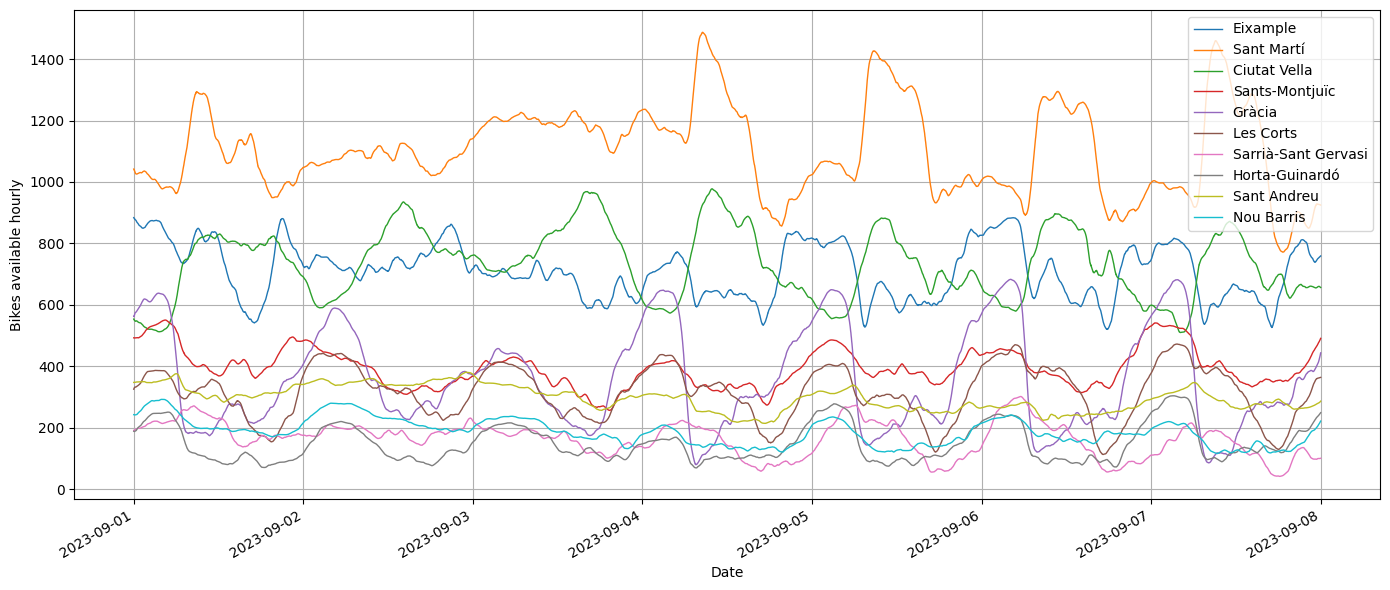

In [ ]:
import matplotlib.pyplot as plt
stations_master_file = main_folder+ '/2024_05_Maig_BicingNou_INFORMACIO.csv'

# Pandas
stations_master = pd.read_csv(stations_master_file, low_memory= False).sort_values(by='station_id')
stations_master['last_updated'] = pd.to_datetime(stations_master['last_updated'])
stations_master = stations_master.sort_values('last_updated').groupby('station_id').last()
stations_master = add_districts(stations_master)

###
total_bikes = json_to_dataframe(files)
total_bikes['dt'] = pd.to_datetime(total_bikes['timestamp_file'], unit='s')
# merge with stations master
# sum all bikes available by dt
total_bikes['total_bikes'] = total_bikes['num_bikes_available'] + total_bikes['num_bikes_disabled']

# Assuming 'stations_data' is defined elsewhere and properly loaded
districts = stations_master['district'].unique()
# change stations_district['short_name'] to int and to string
stations_master['short_name'] = stations_master['short_name'].astype(int).astype(str)

plt.figure(figsize=(14, 6))
for district in districts:
    # filter by district
    total_bikes2 = total_bikes.copy()
    stations_district2 = stations_master[stations_master['district'] == district]
    stations_district = stations_district2['short_name'].to_list()
    total_bikes2 = total_bikes2[total_bikes2['station_id'].isin(stations_district)]

    total_bikes2 = total_bikes2[['dt' ,'num_bikes_available', 'total_bikes']]
    total_bikes2 = total_bikes2.groupby('dt')[['num_bikes_available', 'total_bikes']].sum().reset_index()


    # select only dt and num_bikes_available
    total_bikes2.set_index('dt', inplace=True)
    total_bikes2['num_bikes_available_hourly_avg'] = total_bikes2['num_bikes_available'].rolling(window='1h').mean()
    
    total_bikes2.reset_index(inplace=True)


   
    plt.plot(total_bikes2['dt'], total_bikes2['num_bikes_available_hourly_avg'], label=district, linewidth=1)
    #plt.title(f'Bikes in {district} District')
plt.xlabel('Date')
plt.ylabel('Bikes available hourly')
plt.legend()
plt.grid(True)
plt.gcf().autofmt_xdate()
plt.tight_layout()
plt.show()
